## Introduccion

### Limpieza de la base de datos previo al analisis (SQL)
  - Se analizaron los datos del clima de Chicago en el año del 2017.
  - Se encontro el numero de viajes para cada compañia de taxis del 15 y 16 de noviembre de 2017.
  - Se agrupo por nommbre de compañia y cantidad de viajes.
 
### Analisis de DataFrames (Python)
  - Como anteriormente se procedio a realizar el analisis y limpieza de datos en SQL procedemos a verificar eltipo de datos que contiene cada DataFrame para segurarnos que no existan valores ausentos o nulos.
  
### Analizar el promedio de los viajes por cada compañia de taxis
  - Con la finalidad de ver cual es la compañia con mayor promedio de viajes.
  - Se analizaran las 10 mejores compañias con el mejor promedio de viajes.
  - Se analizara las 25 compañias que han realizado mas viajes.
 
### Graficacion de los DataFrames
  - Se realizaran 2 graficas para el DataFrame con las 10 compañias con el mejor promedio en viajes y la de las 25 compañias con mayor numero de viajes con la finalidad de tener una mejor visualizacion de los datos.
  
### Hipotesis
  - De acuerdo al DataFrame donde analizamos el clima realizaremos nuestra hipotesis nula (H0), donde la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los dias lluviosos.

## Importacion de librerias

In [1]:
# Importar las librerías necesarias
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import psycopg2

### Importacion de archivos csv

In [2]:
# Importar los archivos
df1 = pd.read_csv("/datasets/project_sql_result_01.csv")
df2 = pd.read_csv("/datasets/project_sql_result_04.csv")
df3 = pd.read_csv("/datasets/project_sql_result_07.csv")

## Analisis y limpieza de los DataFrames

### DataFrame 1: Trips Amount

In [3]:
# Se inicia con la exploracion de cada uno de lo DataFrame para anlizar los datos que contienen
# Analizar DataFrame df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Buscar valores duplicados en df1
duplicates = df1.duplicated()
df1[duplicates]

,company_name,trips_amount


In [5]:
# Buscar valores nulos en df1
nulls = df1.isnull().sum()
nulls


company_name    0
trips_amount    0
dtype: int64

In [6]:
# Estudiar los datos que contienen df1
display(df1)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [7]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


El df1 tiene 2 columnas 
  - `company_name`: nombre de la empresa de taxis.
  - `trip-amount`:  el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 
 
El DataFrame tiene 64 indices de los cuales no contienen valores ausentes ni tampoco tiene duplicados.

### DataFrame 2: Average Trips

In [8]:
# Analizar df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Buscar valores duplicados en df2
duplicates = df2.duplicated()
df2[duplicates]


,dropoff_location_name,average_trips


In [10]:
# Buscar valores nulos en df2
nulls = df2.isnull().sum()
nulls

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
# Estudiar los datos que contienen df2
display(df2)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [12]:
df2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


El df2 tiene tambien 2 columnas 
  - `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes.
  -  `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
 
El DataFrame tiene 94 indices de los cuales no contienen valores ausentes ni tampoco tiene duplicados.

### DataFrame 3: Clima y duracion de los viajes

In [13]:
# Analizar df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
# Buscar valores duplicados en df3
duplicates = df3.duplicated()
df3[duplicates]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [15]:
# Buscar valores nulos en df3
nulls = df3.isnull().sum()
nulls

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [16]:
# Estudiar los datos que contienen df3
display(df3)


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [17]:
df3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


El df3 contiene 3 columnas 
  - `start_ts`: fecha y hora de la recogida.
  -  `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje.
  -  `duration_seconds`: duración del viaje en segundos.
 
El DataFrame tiene 94 indices de los cuales no contienen valores; aunque tiene valoes duplicados esto se debe a que son varias compañias de taxis por lo que estos pudieron haber hecho viajes el mismo dia a la misma hora que otra compañia de taxis

## Creacion del Top10 de los barrios con en el promedio mas alto en viajes

In [18]:
# ordernar df2 por la columna 'average_trips'
df2 = df2.sort_values(by='average_trips', ascending=False)
top10 = df2.head(10)
display(top10)


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


La salida del código muestra que el barrio con el mayor promedio de viajes de taxi es "Loop" con un promedio de 10727.47 viajes, seguido de "River North" con un promedio de 9523.67 viajes, y así sucesivamente. Los otros barrios en el top 10 son "Streeterville", "West Loop", "O'Hare", "Lake View", "Grant Park", "Museum Campus", "Gold Coast" y "Sheffield & DePaul".

En resumen, se utiliza el método sort_values para ordenar el DataFrame por la columna average_trips en orden descendente y luego se utiliza el método head para seleccionar los 10 primeros valores, lo que representa los barrios con el mayor promedio de viajes de taxi. El código muestra que "Loop" es el barrio con el mayor promedio de viajes de taxi, seguido de "River North" y otros barrios.

## Top25 de las compañias de taxis con mayor numero de viajes

In [19]:
# Las 25 compañias de taxis con mayor número de viajes
df1 = df1.sort_values(by='trips_amount', ascending=False)
top25 = df1.head(25)
display(top25)


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Se utiliza el método `sort_values` para organizar el DataFrame de manera descendente basándose en la cantidad de viajes (`trips_amount`). Luego, con el método `head`, se seleccionan las primeras 25 filas, que corresponden a las **25 compañías de taxis con el mayor número de viajes** en la ciudad de Chicago. La ejecución del código revela que **"Flash Cab"** lidera la lista en cuanto a viajes realizados, seguida por **"Taxi Affiliation Services"** y otras compañías que completan el top 25.

Es **importante destacar** que solo se han seleccionado las 25 compañías con más viajes para facilitar la creación de una gráfica posterior. Esto se debe a que existían demasiadas compañías para representarlas de manera efectiva en una única gráfica.

## Creacion de graficas de barras

### Grafica de barras del Top25 de compañias de taxis con mas viajes

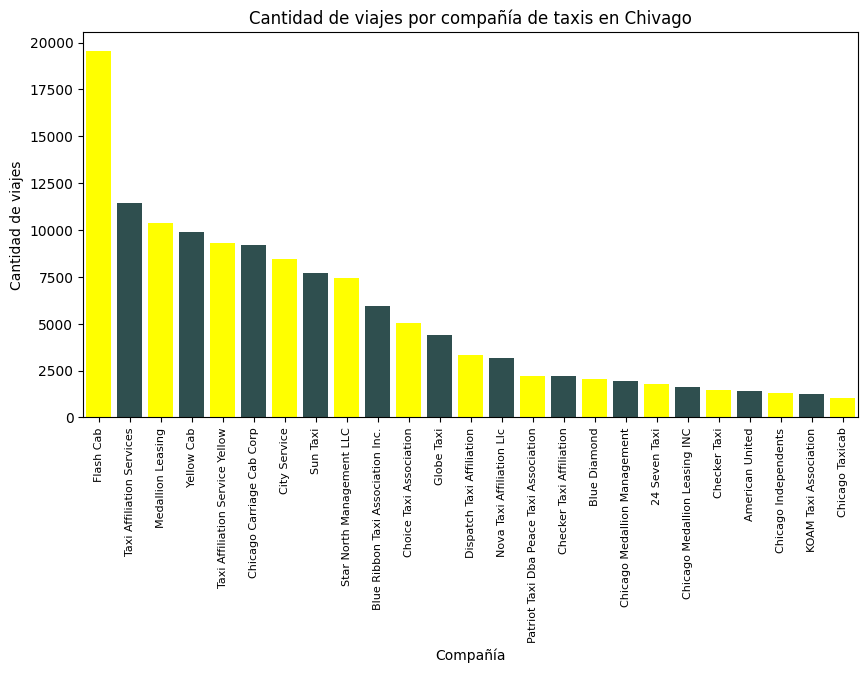

In [20]:
# crear una grafico de barras del top25 de compañias de taxis con mayor número de viajes
top25.plot(kind='bar', x='company_name', y='trips_amount', figsize=(10, 5))

colors = ['yellow' if i % 2 == 0 else 'darkslategrey' for i in range(len(top25))]

plt.rcParams.update({'axes.facecolor': 'lightgray'})
plt.bar(top25['company_name'], top25['trips_amount'], color=colors)
plt.title('Cantidad de viajes por compañía de taxis en Chivago')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de viajes')
plt.xticks(fontsize=8)
plt.legend().set_visible(False)

plt.show()


El grafico de barras nos muestra que la compañía de taxis con el **mayor número de viajes** es **"Flash Cab"** con un total de **19,558 viajes**. A continuación, se encuentra **"Taxi Affiliation Services"** con **11,422 viajes**. La lista continúa con otras compañías destacadas en el top 25, como **"Medallion Leasin"**, **"Yellow Cab"**, y **"Taxi Affiliation Service Yellow"**, entre otras.

Por otro lado, las compañías que ocupan las **últimas posiciones en la lista**, y que por lo tanto realizan la **menor cantidad de viajes**, son **"Chicago Taxicab"** y **"KOAM Taxi Association"**.

### Grafico de barras del Top10 de barrios de Chicago

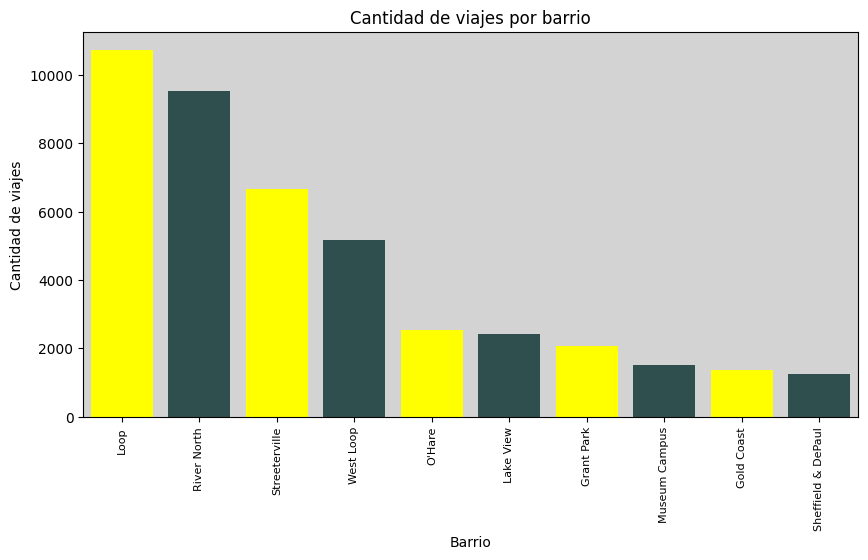

In [21]:
#crear grafico de barras del top10 de barrios con mayor numero de finalizacion de viajes
top10.plot(kind='bar', x='dropoff_location_name', y='average_trips', figsize=(10, 5))

colors = ['yellow' if i % 2 == 0 else 'darkslategrey' for i in range(len(top10))]
plt.rcParams.update({'axes.facecolor': 'lightgray'})
plt.bar(top10['dropoff_location_name'], top10['average_trips'], color=colors)
plt.title('Cantidad de viajes por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de viajes')
plt.xticks(fontsize=8)
plt.legend().set_visible(False)

plt.show()

El **barrio con más viajes** es **"Loop"**, seguido de **"River North"** y **"Streeterville"**. Estos barrios se encuentran en el **centro de la ciudad**, donde se concentran una gran cantidad de empresas, lugares de interés turístico y actividades sociales.

Por otro lado, los **barrios con menos viajes** son **"Sheffield & DePaul"**, **"Gold Coast"** y **"Museum Campus"**. Estos barrios se encuentran en áreas más periféricas de la ciudad, lo que puede explicar la menor cantidad de viajes.

En general, se puede observar una **tendencia clara**: la cantidad de viajes disminuye a medida que se alejan del centro de la ciudad. Esto se debe probablemente a la mayor concentración de actividades y lugares de interés en el centro, lo que atrae a un mayor número de visitantes.

## Hipotesis

  - Hipotesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los dias lluviosos.
  - Hipotesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los dias lluviosos.

### Hipotesis t student

In [22]:
# Prueba de hipótesis t student

# Crear dos muestras, una para los dias lluviosos y otra para los dias no lluviosos.
rainy_days = df3.query('weather_conditions == "Bad"')['duration_seconds']
non_rainy_days = df3.query('weather_conditions == "Good"')['duration_seconds']

# Realizar la prueba de hipótesis
alpha = 0.05
results = st.ttest_ind(rainy_days, non_rainy_days, equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


### Hipotesis prueba levene

In [23]:
# Prueba de hipótesis levene

# Crear dos muestras, una para los dias lluviosos y otra para los dias no lluviosos.
rainy_days = df3.query('weather_conditions == "Bad"')['duration_seconds']
non_rainy_days = df3.query('weather_conditions == "Good"')['duration_seconds']

# Realizar la prueba de hipótesis levene para comprobar la igualdad de varianzas
alpha = 0.05
results = st.levene(rainy_days, non_rainy_days)
print('Prueba de hipótesis Levene')
print('Estadístico de prueba:', results.statistic)
print('Valor p:', results.pvalue)
if results.pvalue < alpha:
    print('Las varianzas son diferentes')
else:
    print('Las varianzas son iguales')

Prueba de hipótesis Levene
Estadístico de prueba: 0.38853489683656073
Valor p: 0.5332038671974493
Las varianzas son iguales



## Análisis de la Duración Promedio de Viajes en Días Lluviosos

En este análisis, se realizó una prueba de hipótesis para determinar si **la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los días lluviosos**.

### Hipótesis

- **Hipótesis nula (H0)**: La duración promedio de los viajes **sí cambia** los días lluviosos.
- **Hipótesis alternativa (H1)**: La duración promedio de los viajes **no cambia** los días lluviosos.

### Método

Para probar estas hipótesis, se crearon dos muestras: **una para los días lluviosos** y **otra para los días no lluviosos**. Luego, se realizó una **prueba t de Student** para comparar las medias de estas dos muestras.

### Resultados

El resultado de la prueba t fue un **p-value de 6.738994326108734e-12**, que es significativamente menor que el nivel de significación establecido (**alpha = 0.05**).

### Rechazo de la Hipótesis Nula

Debido a que el **p-value es menor que alpha**, se **rechaza la hipótesis nula (H0)**. Esto significa que hay evidencia estadística suficiente para concluir que **la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los días lluviosos**, lo que apoya la **hipótesis alternativa (H1)**.

### Preguntas

1. **¿Cómo se plantearon las hipótesis nula y alternativa?**

   Las hipótesis se plantearon de la siguiente manera:
   - **Hipótesis nula (H0)**: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **sí cambia** los días lluviosos.
   - **Hipótesis alternativa (H1)**: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **no cambia** los días lluviosos.

2. **Criterio utilizado para probar las hipótesis y por qué**

   Se utilizó la **prueba t de Student** para comparar las medias de las dos muestras (días lluviosos y días no lluviosos). Se eligió este criterio porque:
   - La **prueba t de Student** es adecuada para comparar las medias de dos muestras independientes.
   - La variable de interés (duración promedio de los viajes) se asume que sigue una distribución normal.
   - La **prueba t de Student** es robusta y ampliamente utilizada en estadística para comparar medias.

   Además, se estableció un nivel de significación (**alpha = 0.05**) para determinar si el resultado de la prueba es estadísticamente significativo.